In [ ]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

# Load dataset

In [1]:
# Upload file dataset CSV
from google.colab import files
uploaded = files.upload()
with open ('model_pkl', 'wb') as file:
pickle.dump(MLProject_J41, file)

IndentationError: expected an indented block after 'with' statement on line 4 (2777869171.py, line 5)

In [ ]:
# Membaca dataset
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

In [ ]:
# Menampilkan kolom yang tersedia dan jumlah data per kolom
print("Kolom dalam dataset:", df.columns.tolist())
print("\nJumlah data per kolom:")
print(df.count())
print("Model berhasil disimpan ke 'Model.pkl")

Kolom dalam dataset: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Jumlah data per kolom:
age         1025
sex         1025
cp          1025
trestbps    1025
chol        1025
fbs         1025
restecg     1025
thalach     1025
exang       1025
oldpeak     1025
slope       1025
ca          1025
thal        1025
target      1025
dtype: int64


In [ ]:
# Mengecek data yang hilang
print("\nJumlah data yang hilang:")
print(df.isnull().sum())

# Mengisi data yang hilang (jika ada)
df.fillna(df.mean(), inplace=True)


Jumlah data yang hilang:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
# Mengecek tipe data
print("\nTipe data setiap kolom:")
print(df.dtypes)


Tipe data setiap kolom:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [ ]:
# Normalisasi fitur numerik
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[num_features] = scaler.fit_transform(df[num_features])

Exploratory Data Analysis (EDA)

In [ ]:
# Deskripsi statistik
print("\nDeskripsi statistik dataset:")
print(df.describe())


Deskripsi statistik dataset:
               age          sex           cp     trestbps         chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.529878     0.695610     0.942439     0.354827     0.273973   
std       0.189006     0.460373     1.029641     0.165252     0.117791   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.395833     0.000000     0.000000     0.245283     0.194064   
50%       0.562500     1.000000     1.000000     0.339623     0.260274   
75%       0.666667     1.000000     2.000000     0.433962     0.340183   
max       1.000000     1.000000     3.000000     1.000000     1.000000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756     0.596291     0.336585     0.172825   
std       0.356527     0.527878     0.175616     0.472772     0.189525   
min    

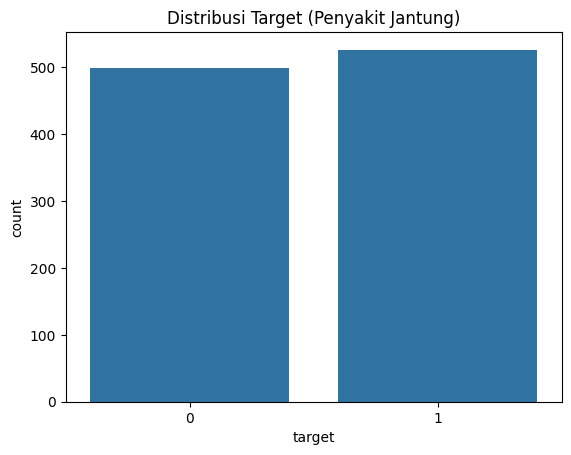

In [ ]:
# Visualisasi distribusi target
sns.countplot(x='target', data=df)
plt.title("Distribusi Target (Penyakit Jantung)")
plt.show()

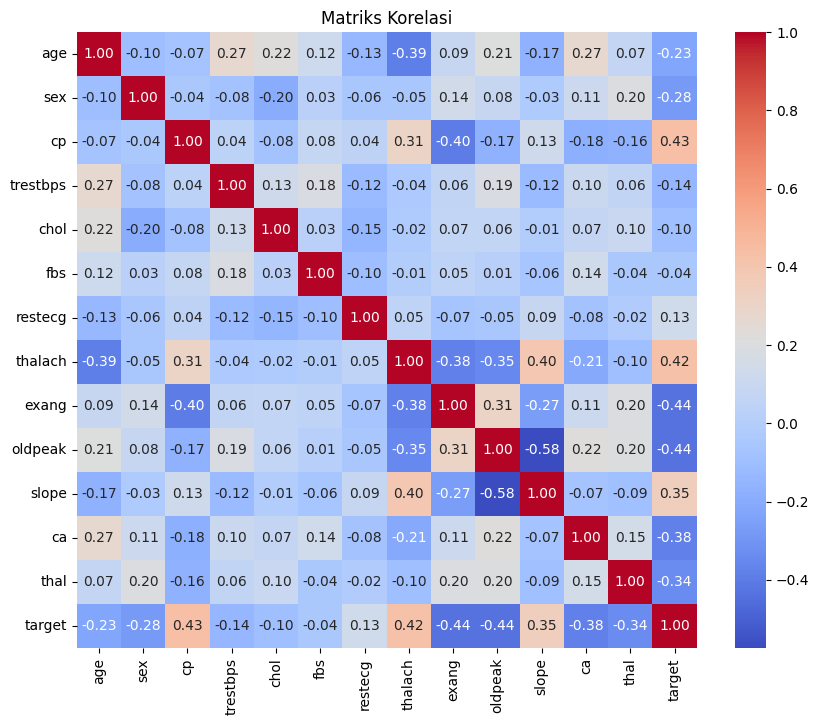

In [ ]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

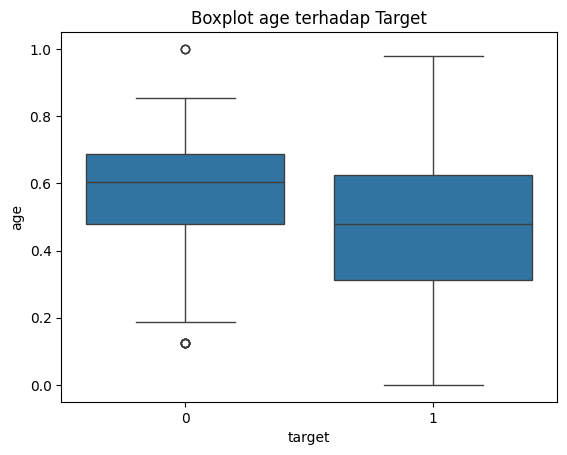

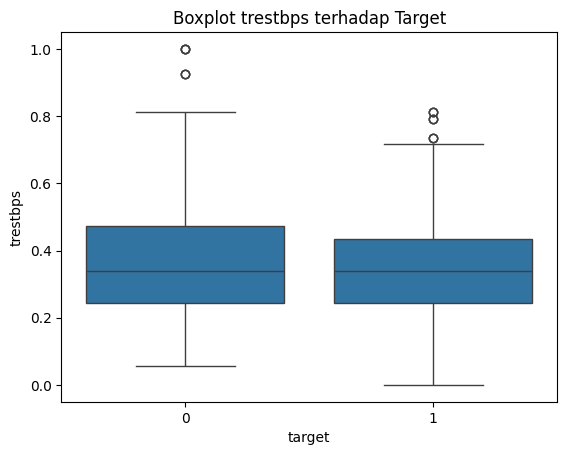

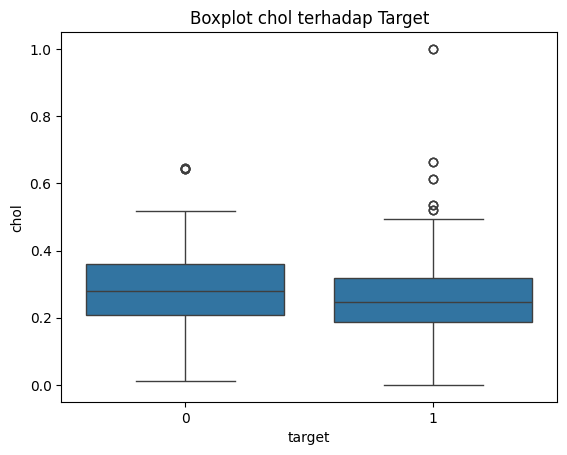

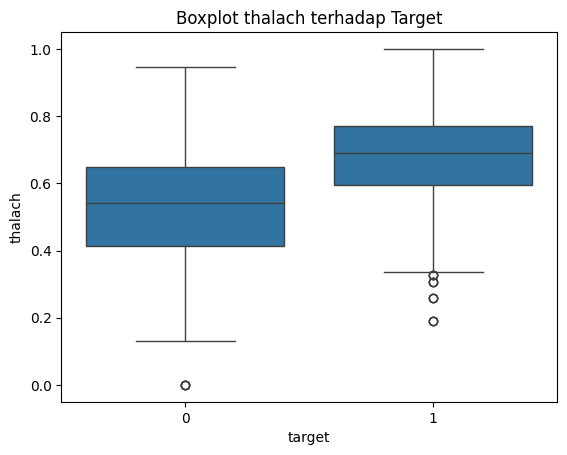

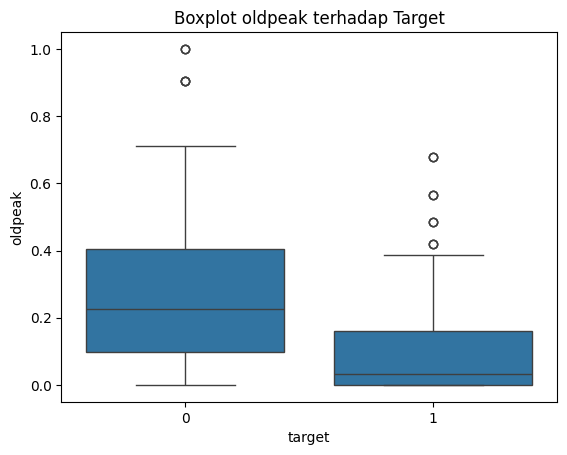

In [ ]:
# Boxplot fitur berdasarkan target
for feature in num_features:
    sns.boxplot(x='target', y=feature, data=df)
    plt.title(f"Boxplot {feature} terhadap Target")
    plt.show()

Membangun Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Memisahkan fitur (X) dan target (y)
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Membagi dataset menjadi training dan testing (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Melatih model Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Melatih model SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluasi Random Forest
rf_pred = rf_model.predict(X_test)
print("\nEvaluasi Random Forest")
print("Akurasi:", accuracy_score(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))


Evaluasi Random Forest
Akurasi: 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



In [ ]:
# Fungsi untuk meminta input manual dari pengguna
def manual_input():
    print("Masukkan data berikut untuk prediksi:")
    age = float(input("Umur (age): "))
    sex = int(input("Jenis Kelamin (sex: 0 = Perempuan, 1 = Laki-laki): "))
    cp = int(input("Tipe Nyeri Dada (cp: 0, 1, 2, 3): "))
    trestbps = float(input("Tekanan Darah Istirahat (trestbps): "))
    chol = float(input("Kolesterol (chol): "))
    fbs = int(input("Gula Darah Puasa > 120 mg/dl (fbs: 0 = Tidak, 1 = Ya): "))
    restecg = int(input("Hasil Elektrokardiografi Istirahat (restecg: 0, 1, 2): "))
    thalach = float(input("Detak Jantung Maksimal (thalach): "))
    exang = int(input("Angina Induksi Latihan (exang: 0 = Tidak, 1 = Ya): "))
    oldpeak = float(input("Depresi ST akibat olahraga (oldpeak): "))
    slope = int(input("Kemiringan Segmen ST (slope: 0, 1, 2): "))
    ca = int(input("Jumlah Pembuluh Warna Fluoroscopy (ca: 0-4): "))
    thal = int(input("Nilai Thalassemia (thal: 0, 1, 2, 3): "))

    # Gabungkan input menjadi array
    return [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]

# Normalisasi input dan prediksi
def manual_prediction(model):
    # Meminta input data
    user_input = manual_input()

    # Normalisasi data numerik
    user_input_normalized = scaler.transform([user_input[:5]])[0]  # Normalisasi hanya fitur numerik
    processed_input = user_input_normalized.tolist() + user_input[5:]  # Gabungkan dengan fitur kategori

    # Prediksi menggunakan model
    result = predict_heart_disease(model, processed_input)
    return result

# Contoh penggunaan untuk Random Forest
print("\nRandom Forest:")
print("Hasil prediksi:", manual_prediction(rf_model))



Random Forest:
Masukkan data berikut untuk prediksi:
Umur (age): 54
Jenis Kelamin (sex: 0 = Perempuan, 1 = Laki-laki): 1
Tipe Nyeri Dada (cp: 0, 1, 2, 3): 3
Tekanan Darah Istirahat (trestbps): 120
Kolesterol (chol): 1
Gula Darah Puasa > 120 mg/dl (fbs: 0 = Tidak, 1 = Ya): 1
Hasil Elektrokardiografi Istirahat (restecg: 0, 1, 2): 2
Detak Jantung Maksimal (thalach): 130
Angina Induksi Latihan (exang: 0 = Tidak, 1 = Ya): 1
Depresi ST akibat olahraga (oldpeak): 2
